<a href="https://colab.research.google.com/github/ShedovaNastya/BVT2203_project_workshop/blob/main/researches/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование на размер батча

In [4]:
!pip install tqdm

In [29]:
import torch
import random
import numpy as np
from tqdm import tqdm_notebook as tqdm
import sklearn.datasets
from sklearn.model_selection import train_test_split
import time as vremya


wine = sklearn.datasets.load_wine()

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.determenistic = True

time_of_learning = np.array([])
num_of_batch = np.array([])
accuracy = np.array([])

x_train, x_test, y_train, y_test = train_test_split(
    wine.data[:, :],
    wine.target,
    test_size = 0.3,
    shuffle = True
)

full_x = np.concatenate([x_train, x_test])
full_y = np.concatenate([y_train, y_test])
full_x = torch.FloatTensor(full_x)
full_y = torch.LongTensor(full_y)
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)



class WineNet(torch.nn.Module):

  def __init__(self, n_hidden_neurons):
    super(WineNet, self).__init__()
    self.fc1 = torch.nn.Linear(13, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
    self.act2 = torch.nn.Sigmoid()
    self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
    self.softmax = torch.nn.Softmax(dim = 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    return x

  def inference(self, x):
    x = self.forward(x)
    x = self.softmax(x)
    return x


In [31]:
for batch_size in tqdm(range(2, len(x_train), 5), desc = 'research batch_size'):
  start_time = vremya.time()
  random.seed(0)
  np.random.seed(0)
  torch.manual_seed(0)
  torch.cuda.manual_seed(0)
  torch.backends.cudnn.determenistic = True

  wine_net = WineNet(13)

  loss = torch.nn.CrossEntropyLoss()

  optimizer = torch.optim.Adam(wine_net.parameters(), lr = 0.001)

  for epoch in tqdm(range(1000), desc = 'epoch'):

    np.random.seed(0)
    order = np.random.permutation(len(x_train))

    for start_index in range(0, len(x_train), batch_size):

      optimizer.zero_grad()

      batch_indexes = order[start_index:start_index + batch_size]

      x_batch = x_train[batch_indexes]
      y_batch = y_train[batch_indexes]

      preds = wine_net.forward(x_batch)

      loss_val = loss(preds, y_batch)
      loss_val.backward()

      optimizer.step()

  end_time = vremya.time()
  predicts = wine_net.inference(full_x).argmax(dim = 1)
  num_of_batch = np.append(num_of_batch, batch_size)
  accuracy = np.append(accuracy, (predicts == full_y).float().mean())
  time_of_learning = np.append(time_of_learning, end_time - start_time)



<ipython-input-31-06a716ec6fd2>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_size in tqdm(range(2, len(x_train), 5), desc = 'research batch_size'):


research batch_size:   0%|          | 0/25 [00:00<?, ?it/s]

<ipython-input-31-06a716ec6fd2>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm(range(1000), desc = 'epoch'):


epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

In [32]:
print(num_of_batch, time_of_learning)

[  2.   2.   7.  12.  17.  22.  27.  32.  37.  42.  47.  52.  57.  62.
  67.  72.  77.  82.  87.  92.  97. 102. 107. 112. 117. 122.] [52.66298795 55.42700863 15.55057526 10.28066468  7.79689765  6.58434677
  6.2858932   3.4726758   4.08746386  4.7576983   3.0630548   3.74007869
  3.73364592  2.65760565  1.81544256  1.78988075  1.83603239  1.71728086
  1.61293054  2.18756032  1.99512982  2.15663457  2.72964764  1.73667479
  2.42762017  2.50920415]


Text(0, 0.5, 'time')

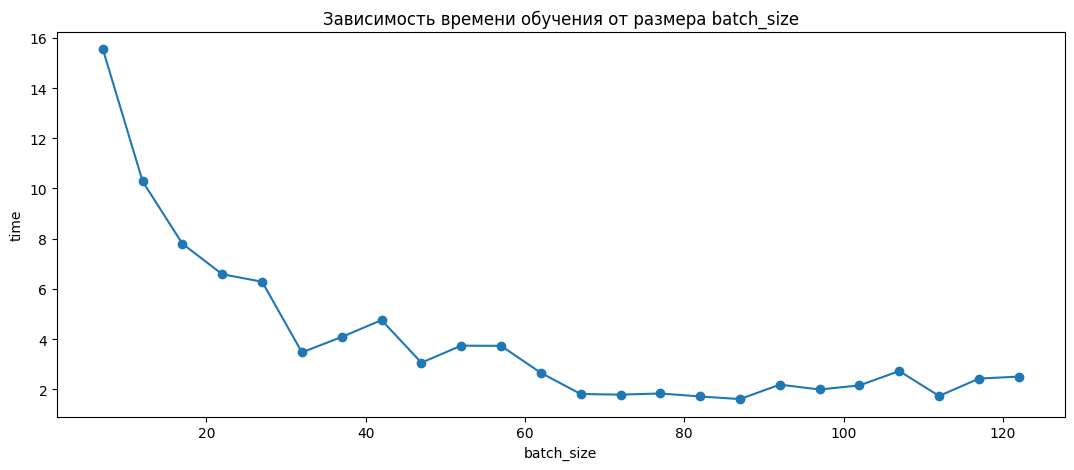

In [33]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)
plt.plot(num_of_batch[2:], time_of_learning[2:])
plt.scatter(num_of_batch[2:], time_of_learning[2:])
plt.title('Зависимость времени обучения от размера batch_size')
plt.xlabel('batch_size')
plt.ylabel('time')

**Итог:** время обучения напрямую зависит от размера батча. Чем больше значение batch_size, тем быстрее выпоняется обучение.

# Исследование на количество нейронов

In [3]:
import torch
import random
import numpy as np
from tqdm import tqdm_notebook as tqdm
import sklearn.datasets
from sklearn.model_selection import train_test_split
import time as vremya

wine = sklearn.datasets.load_wine()

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.determenistic = True

num_of_neurons = np.array([])
accuracy = np.array([])

x_train, x_test, y_train, y_test = train_test_split(
    wine.data[:, :],
    wine.target,
    test_size = 0.3,
    shuffle = True
)

x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)



class WineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(WineNet, self).__init__()
    self.fc1 = torch.nn.Linear(13, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
    self.act2 = torch.nn.Sigmoid()
    self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
    self.softmax = torch.nn.Softmax(dim = 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    return x

  def inference(self, x):
    x = self.forward(x)
    x = self.softmax(x)
    return x

In [5]:
for n_hidden_neurons in tqdm(range(1, 100), desc='n_hidden_neurons'):
  random.seed(0)
  np.random.seed(0)
  torch.manual_seed(0)
  torch.cuda.manual_seed(0)
  torch.backends.cudnn.determenistic = True

  wine_net = WineNet(n_hidden_neurons)

  loss = torch.nn.CrossEntropyLoss()

  optimizer = torch.optim.Adam(wine_net.parameters(), lr = 0.001)

  for epoch in tqdm(range(500), desc = str(n_hidden_neurons) + ' neurons'):

    np.random.seed(0)

    batch_indexes = np.random.permutation(len(x_train))

    x_batch = x_train[batch_indexes]
    y_batch = y_train[batch_indexes]

    optimizer.zero_grad()

    preds = wine_net.forward(x_batch)

    loss_vall = loss(preds, y_batch)
    loss_vall.backward()
    optimizer.step()

  predicts = wine_net.inference(x_test).argmax(dim = 1)
  num_of_neurons = np.append(num_of_neurons, n_hidden_neurons)
  accuracy = np.append(accuracy, (predicts == y_test).float().mean())

<ipython-input-5-c92d92ab99f2>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n_hidden_neurons in tqdm(range(1, 100), desc='n_hidden_neurons'):


n_hidden_neurons:   0%|          | 0/99 [00:00<?, ?it/s]

<ipython-input-5-c92d92ab99f2>:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm(range(500), desc = str(n_hidden_neurons) + ' neurons'):


1 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

2 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

3 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

4 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

5 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

6 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

7 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

8 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

9 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

10 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

11 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

12 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

13 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

14 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

15 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

16 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

17 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

18 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

19 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

20 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

21 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

22 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

23 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

24 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

25 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

26 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

27 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

28 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

29 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

30 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

31 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

32 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

33 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

34 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

35 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

36 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

37 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

38 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

39 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

40 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

41 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

42 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

43 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

44 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

45 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

46 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

47 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

48 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

49 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

50 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

51 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

52 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

53 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

54 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

55 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

56 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

57 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

58 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

59 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

60 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

61 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

62 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

63 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

64 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

65 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

66 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

67 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

68 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

69 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

70 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

71 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

72 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

73 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

74 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

75 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

76 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

77 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

78 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

79 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

80 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

81 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

82 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

83 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

84 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

85 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

86 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

87 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

88 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

89 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

90 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

91 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

92 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

93 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

94 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

95 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

96 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

97 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

98 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

99 neurons:   0%|          | 0/500 [00:00<?, ?it/s]

Text(0, 0.5, 'качество обучения')

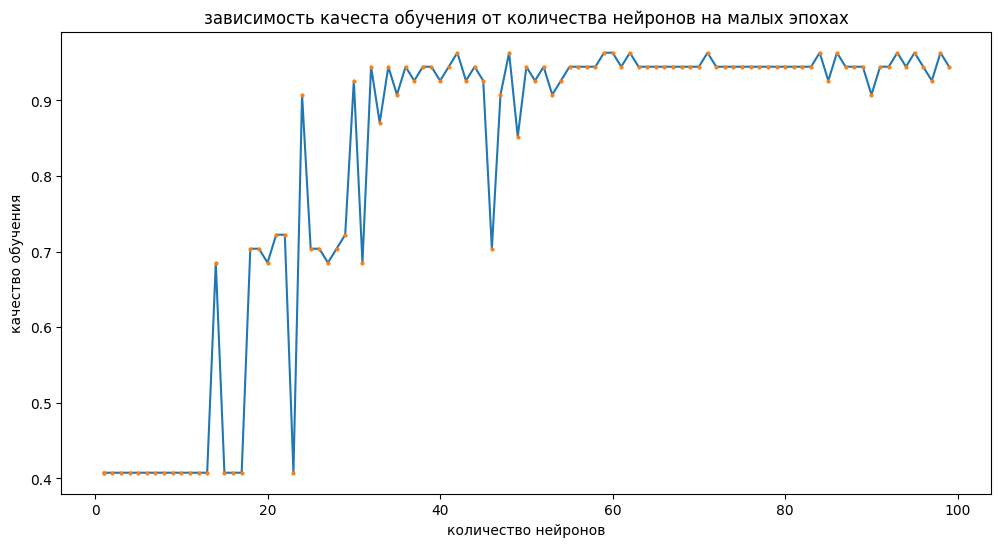

In [6]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(num_of_neurons, accuracy)
plt.plot(num_of_neurons, accuracy, 'o', markersize = 2)
plt.title('зависимость качеста обучения от количества нейронов на малых эпохах')
plt.xlabel('количество нейронов')
plt.ylabel('качество обучения')

**Итог:** Чем больше колиество нейронов, тем качественнее происходит обучение нейросети

# Исследование зависимости качества обучения от размера данных

In [7]:
import torch
import numpy as np
from tqdm import tqdm_notebook as tqdm
import sklearn.datasets
from sklearn.model_selection import train_test_split

wine = sklearn.datasets.load_wine()

num_of_train = np.array([])
accuracy = np.array([])

class WineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons = 55):
    super(WineNet, self).__init__()
    self.fc1 = torch.nn.Linear(13, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
    self.act2 = torch.nn.Sigmoid()
    self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
    self.softmax = torch.nn.Softmax(dim = 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    return x

  def inference(self, x):
    x = self.forward(x)
    x = self.softmax(x)
    return x


In [8]:
for train_num in tqdm(range(1, 170), desc = 'general cycle'):
  torch.manual_seed(0)
  torch.cuda.manual_seed(0)
  torch.backends.cudnn.deterministic = True

  x_train, x_test, y_train, y_test = train_test_split(
      wine.data[:, :],
      wine.target,
      train_size = train_num,
      test_size = 178 - train_num,
      shuffle = True
  )

  x_train = torch.FloatTensor(x_train)
  x_test = torch.FloatTensor(x_test)
  y_train = torch.LongTensor(y_train)
  y_test = torch.LongTensor(y_test)

  wine_net = WineNet()

  loss = torch.nn.CrossEntropyLoss()

  optimizer = torch.optim.Adam(wine_net.parameters(), lr = 0.001)

  for epoch in tqdm(range(500), desc = str(train_num) + ' train objects'):
    optimizer.zero_grad()

    np.random.seed(0)

    batch_indexes = np.random.permutation(len(x_train))

    x_batch = x_train[batch_indexes]
    y_batch = y_train[batch_indexes]

    preds = wine_net.forward(x_batch)

    loss_vall = loss(preds, y_batch)
    loss_vall.backward()

    optimizer.step()

  predicts = wine_net.inference(x_test).argmax(dim = 1)
  num_of_train = np.append(num_of_train, train_num)
  accuracy = np.append(accuracy, (predicts == y_test).float().mean())

<ipython-input-8-23afba2693f0>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for train_num in tqdm(range(1, 170), desc = 'general cycle'):


general cycle:   0%|          | 0/169 [00:00<?, ?it/s]

<ipython-input-8-23afba2693f0>:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm(range(500), desc = str(train_num) + ' train objects'):


1 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

2 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

3 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

4 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

5 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

6 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

7 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

8 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

9 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

10 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

11 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

12 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

13 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

14 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

15 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

16 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

17 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

18 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

19 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

20 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

21 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

22 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

23 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

24 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

25 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

26 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

27 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

28 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

29 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

30 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

31 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

32 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

33 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

34 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

35 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

36 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

37 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

38 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

39 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

40 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

41 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

42 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

43 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

44 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

45 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

46 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

47 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

48 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

49 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

50 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

51 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

52 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

53 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

54 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

55 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

56 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

57 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

58 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

59 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

60 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

61 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

62 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

63 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

64 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

65 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

66 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

67 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

68 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

69 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

70 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

71 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

72 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

73 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

74 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

75 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

76 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

77 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

78 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

79 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

80 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

81 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

82 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

83 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

84 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

85 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

86 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

87 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

88 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

89 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

90 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

91 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

92 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

93 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

94 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

95 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

96 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

97 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

98 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

99 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

100 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

101 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

102 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

103 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

104 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

105 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

106 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

107 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

108 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

109 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

110 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

111 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

112 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

113 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

114 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

115 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

116 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

117 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

118 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

119 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

120 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

121 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

122 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

123 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

124 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

125 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

126 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

127 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

128 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

129 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

130 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

131 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

132 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

133 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

134 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

135 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

136 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

137 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

138 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

139 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

140 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

141 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

142 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

143 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

144 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

145 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

146 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

147 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

148 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

149 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

150 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

151 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

152 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

153 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

154 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

155 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

156 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

157 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

158 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

159 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

160 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

161 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

162 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

163 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

164 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

165 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

166 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

167 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

168 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

169 train objects:   0%|          | 0/500 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Зависимость качеста от числа нейронов')

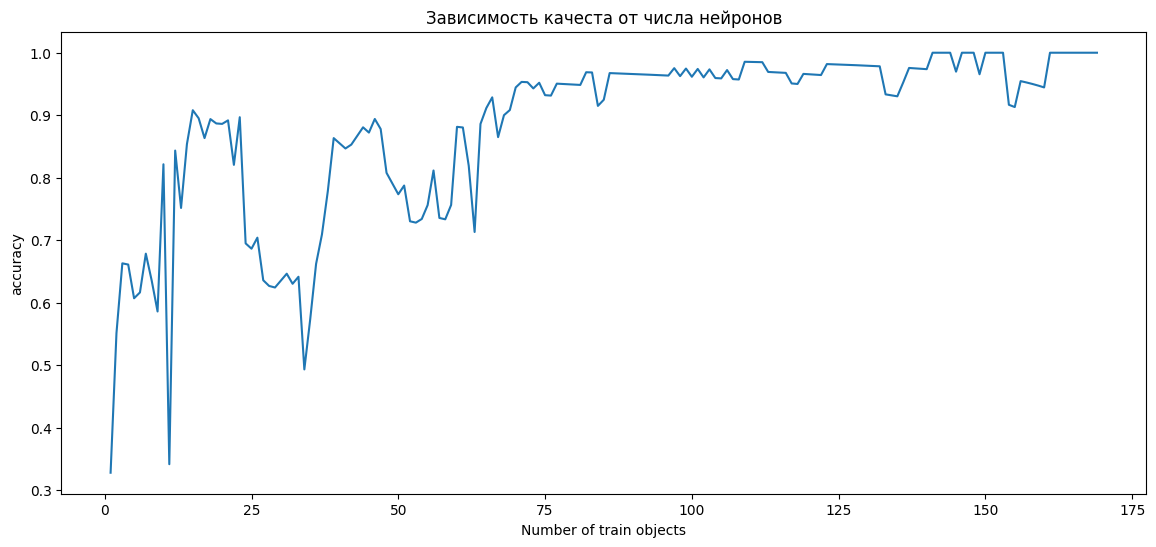

In [9]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (14.0, 6.0)
plt.plot(num_of_train, accuracy)
plt.xlabel('Number of train objects')
plt.ylabel('accuracy')
plt.title('Зависимость качеста от числа нейронов')

In [15]:
for x, y in zip(num_of_train, accuracy):
  print('num_of_train',int(x),'accuracy', y)

num_of_train 1 accuracy 0.32768362760543823
num_of_train 2 accuracy 0.5511363744735718
num_of_train 3 accuracy 0.6628571152687073
num_of_train 4 accuracy 0.6609195470809937
num_of_train 5 accuracy 0.6069363951683044
num_of_train 6 accuracy 0.6162790656089783
num_of_train 7 accuracy 0.6783625483512878
num_of_train 8 accuracy 0.6352941393852234
num_of_train 9 accuracy 0.5857987999916077
num_of_train 10 accuracy 0.8214285969734192
num_of_train 11 accuracy 0.341317355632782
num_of_train 12 accuracy 0.8433734774589539
num_of_train 13 accuracy 0.7515151500701904
num_of_train 14 accuracy 0.8536585569381714
num_of_train 15 accuracy 0.907975435256958
num_of_train 16 accuracy 0.895061731338501
num_of_train 17 accuracy 0.8633540272712708
num_of_train 18 accuracy 0.893750011920929
num_of_train 19 accuracy 0.8867924809455872
num_of_train 20 accuracy 0.8860759735107422
num_of_train 21 accuracy 0.8917197585105896
num_of_train 22 accuracy 0.8205128312110901
num_of_train 23 accuracy 0.896774172782898
n

**Итог:** результат обучения нейросети напрямую зависит от объема данных